# Creating Sub-Grids from larger, familiar Ocean Grids

In [124]:
import xarray as xr

grid = xr.open_dataset("/Users/james/Documents/Github/esm_lab/grid_gen/gridInfo/chassxu/regional.mom6.nc")


In [125]:
import cartopy 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
def plotgrid(grid, plotStep, plotproj='nearside', crs=cartopy.crs.Geodetic(), transform=cartopy.crs.Geodetic(),mapExtent=[], lon0=-50, lat0=45, title=""):
    #initiate new plot, infer projection within the plotting procedure
    plt.figure(figsize=(10,10))
    if plotproj=='nearside':
        ax = plt.subplot(111, projection=cartopy.crs.NearsidePerspective(central_longitude=lon0, central_latitude=lat0))
    if plotproj=='platecarree':
        ax = plt.subplot(111, projection=cartopy.crs.PlateCarree())
    if mapExtent:
        ax.set_extent(mapExtent, crs=cartopy.crs.Geodetic())
    ax.stock_img()
    ax.coastlines()
    ax.gridlines()
    gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([-105, -100, -95, -45, -40, -35, -30, 0])
    gl.ylocator = mticker.FixedLocator([-10,-5,0,5, 55,60,65])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.xlabel_style = {'size': 15, 'color': 'gray'}
    #gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

    nj = grid.dims['nyp']
    ni = grid.dims['nxp']

    iColor = 'k'
    jColor = 'k'
    iLinewidth = 1.0
    jLinewidth = 1.0
    plotAllVertices= True
    for i in range(0, ni+1, plotStep):
        if (i == 0 or i == (ni-1)) or plotAllVertices:
            if i <= ni-1:
                ax.plot(grid['x'][:,i], grid['y'][:,i], iColor, linewidth=iLinewidth, transform=transform)
    for j in range(0, nj+1, plotStep):
        if (j == 0 or j == (nj-1)) or plotAllVertices:
            if j <= nj-1:
                ax.plot(grid['x'][j,:], grid['y'][j,:], jColor, linewidth=jLinewidth, transform=transform)
    
    plt.title(title)
    
    return ax

# ideally I would use find nearest to find the indice closest to a particular value, but because this is a mesh 2d grid it doesn't work as intended
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx



/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


<GeoAxesSubplot:title={'center':'ChassXu 1/25deg shown at 100x scale'}>

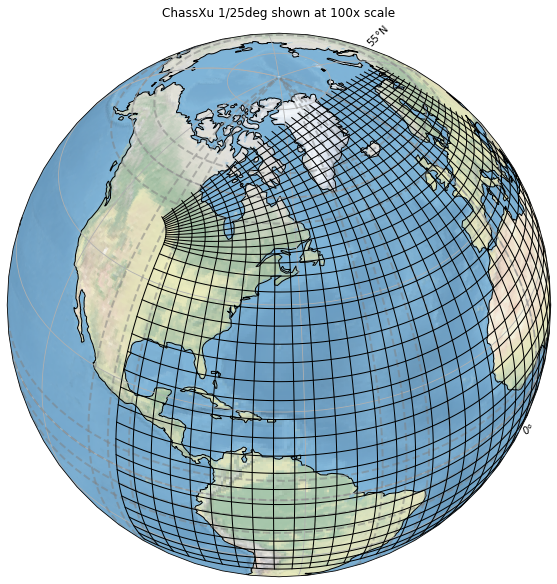

In [126]:
plotgrid(grid=grid, plotStep=100, lat0=40, lon0=-65, title="ChassXu 1/25deg shown at 100x scale")

# Use Index Selection to create subgrid

In [127]:
## ideally I would use find nearest to find the indice closest to a particular value, but because this is a mesh 2d grid it doesn't work as intended
#latMinInd = find_nearest(array = grid['y'].values, value = 45)
#latMaxInd = find_nearest(array = grid['y'].values, value = 50)
#lonMinInd = find_nearest(array = grid['x'].values, value = -80)
#lonMaxInd = find_nearest(array = grid['x'].values, value = -70)

In [128]:
# v1 - southern boundary at 5 South
#latMinInd = 600
#latMaxInd = 2550
#lonMinInd = 0
#lonMaxInd = 1550

# v2 - southern boundary at 5 North
latMinInd = 860
latMaxInd = 2550
lonMinInd = 0
lonMaxInd = 1550

In [129]:
subgrid = grid.isel(nyp=slice(latMinInd, latMaxInd+1), nxp=slice(lonMinInd,lonMaxInd+1), ny=slice(latMinInd, latMaxInd), nx=slice(lonMinInd,lonMaxInd))
subgrid

<xarray.Dataset>
Dimensions:   (nx: 1550, nxp: 1551, ny: 1690, nyp: 1691)
Dimensions without coordinates: nx, nxp, ny, nyp
Data variables:
    x         (nyp, nxp) float64 ...
    y         (nyp, nxp) float64 ...
    angle_dx  (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    area      (ny, nx) float64 ...
    tile      |S255 ...
Attributes:
    history:  grid_hycom2mom6

/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


<GeoAxesSubplot:title={'center':'ChassXu 1/25deg Subset'}>

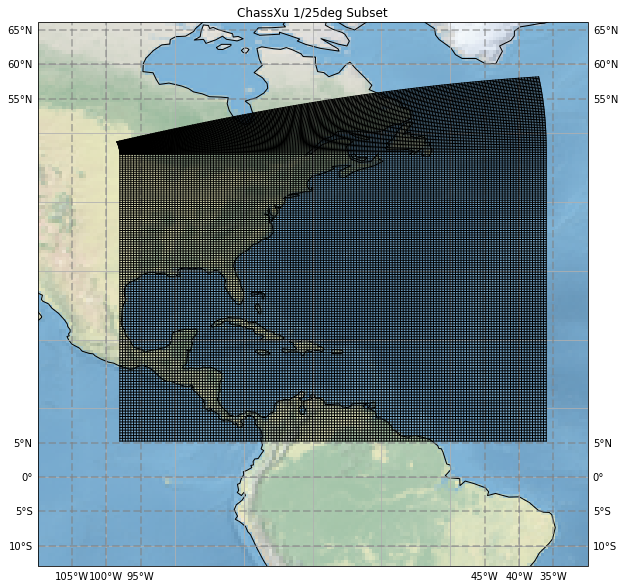

In [130]:
plotgrid(grid=subgrid, plotStep=10, plotproj='platecarree',mapExtent=[-110, -30, -10,60], title="ChassXu 1/25deg Subset")

/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


<GeoAxesSubplot:title={'center':'ChassXu 1/25deg Subset at 10x scale'}>

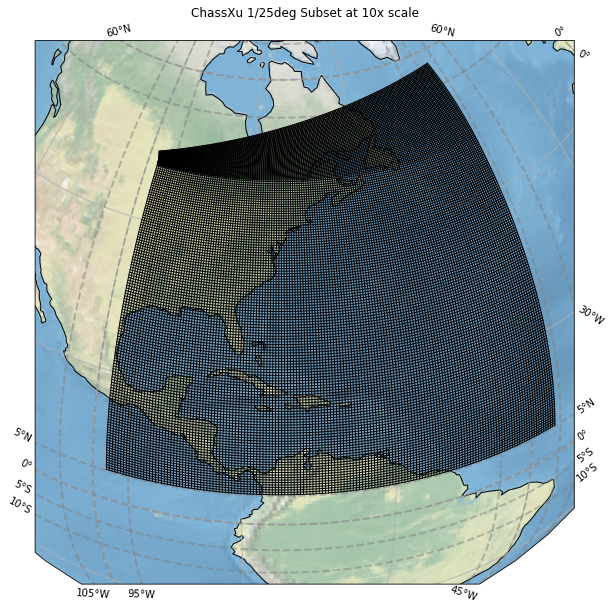

In [131]:
plotgrid(grid=subgrid, plotStep=10,mapExtent=[-110, -30, -10,60], lat0=40, lon0=-75, title="ChassXu 1/25deg Subset at 10x scale")

In [132]:
subgrid.to_netcdf("/Users/james/Downloads/nwa25.nc")

In [133]:
test = xr.open_dataset("/Users/james/Downloads/nwa25.nc")

In [134]:
test

<xarray.Dataset>
Dimensions:   (nx: 1550, nxp: 1551, ny: 1690, nyp: 1691)
Dimensions without coordinates: nx, nxp, ny, nyp
Data variables:
    x         (nyp, nxp) float64 ...
    y         (nyp, nxp) float64 ...
    angle_dx  (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    area      (ny, nx) float64 ...
    tile      |S255 ...
Attributes:
    history:  grid_hycom2mom6

/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


<GeoAxesSubplot:>

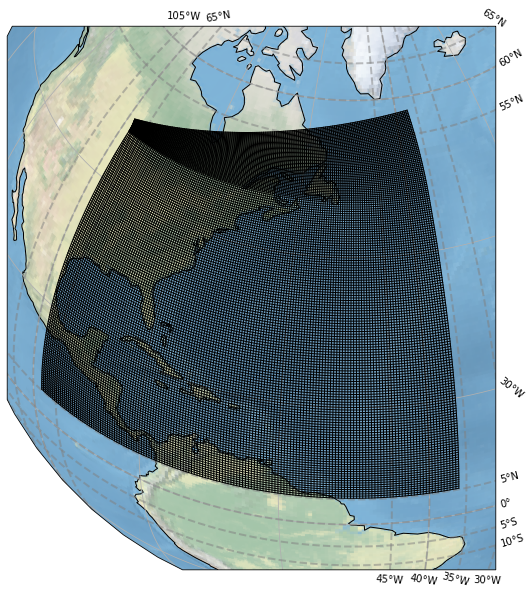

In [135]:
plotgrid(grid=test, plotStep=10, mapExtent=[-110, -30, -10,60])

# Load bathymetry and landmask

In [136]:
land = xr.open_dataset("/Users/james/Documents/Github/esm_lab/grid_gen/gridInfo/chassxu/09m11/land_mask.nc")
land

<xarray.Dataset>
Dimensions:  (nx: 1678, ny: 1844)
Dimensions without coordinates: nx, ny
Data variables:
    mask     (ny, nx) float64 ...
Attributes:
    grid_version:  0.2
    code_version:  $Name:  $
    history:       make_quick_mosaic --input_mosaic ocean_mosaic.nc --mosaic_...

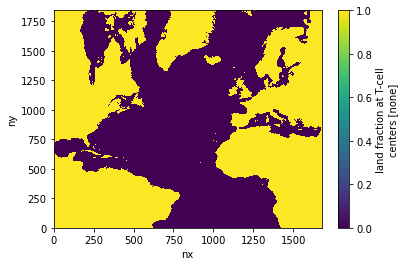

In [137]:
land.mask.plot()

In [138]:
subland = land.isel(ny=slice(int(latMinInd/2), int(latMaxInd/2)), nx=slice(int(lonMinInd/2),int(lonMaxInd/2)))
subland

<xarray.Dataset>
Dimensions:  (nx: 775, ny: 845)
Dimensions without coordinates: nx, ny
Data variables:
    mask     (ny, nx) float64 ...
Attributes:
    grid_version:  0.2
    code_version:  $Name:  $
    history:       make_quick_mosaic --input_mosaic ocean_mosaic.nc --mosaic_...

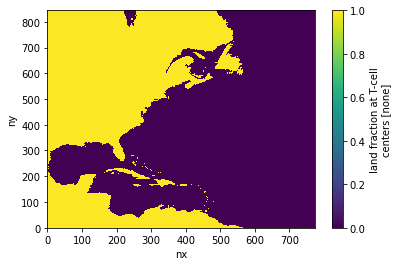

In [139]:
subland.mask.plot()

In [141]:
ocean = xr.open_dataset("/Users/james/Documents/Github/esm_lab/grid_gen/gridInfo/chassxu/09m11/ocean_mask.nc")
ocean

<xarray.Dataset>
Dimensions:  (nx: 1678, ny: 1844)
Dimensions without coordinates: nx, ny
Data variables:
    mask     (ny, nx) float64 ...
Attributes:
    grid_version:  0.2
    code_version:  $Name:  $
    history:       make_quick_mosaic --input_mosaic ocean_mosaic.nc --mosaic_...

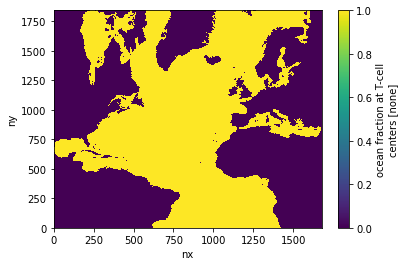

In [142]:
ocean.mask.plot()

In [143]:
subocean = ocean.isel(ny=slice(int(latMinInd/2), int(latMaxInd/2)), nx=slice(int(lonMinInd/2),int(lonMaxInd/2)))
subocean

<xarray.Dataset>
Dimensions:  (nx: 775, ny: 845)
Dimensions without coordinates: nx, ny
Data variables:
    mask     (ny, nx) float64 ...
Attributes:
    grid_version:  0.2
    code_version:  $Name:  $
    history:       make_quick_mosaic --input_mosaic ocean_mosaic.nc --mosaic_...

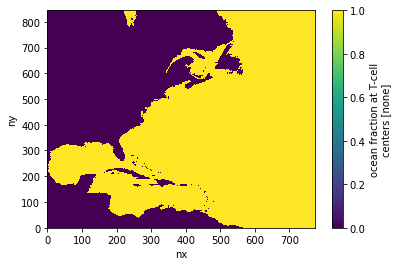

In [144]:
subocean.mask.plot()

In [145]:
topo = xr.open_dataset("/Users/james/Documents/Github/esm_lab/grid_gen/gridInfo/chassxu/09m11/depth_ATLb0.08_09m11_mom6.nc")
topo

<xarray.Dataset>
Dimensions:  (nx: 1678, ny: 1844)
Dimensions without coordinates: nx, ny
Data variables:
    depth    (ny, nx) float32 ...
    wet      (ny, nx) float32 ...
Attributes:
    comment:  depth_GLBb0.08_09m11 subregioned to ATLb0.08 via isuba_topog | ...
    history:  topo_2mom6

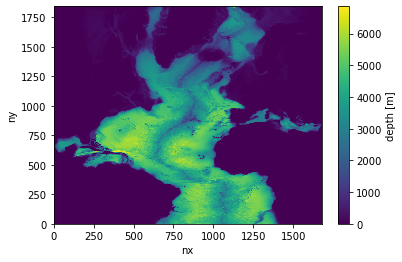

In [146]:
topo.depth.plot()

In [147]:
subtopo = topo.isel(ny=slice(int(latMinInd/2), int(latMaxInd/2)), nx=slice(int(lonMinInd/2),int(lonMaxInd/2)))
subtopo

<xarray.Dataset>
Dimensions:  (nx: 775, ny: 845)
Dimensions without coordinates: nx, ny
Data variables:
    depth    (ny, nx) float32 ...
    wet      (ny, nx) float32 ...
Attributes:
    comment:  depth_GLBb0.08_09m11 subregioned to ATLb0.08 via isuba_topog | ...
    history:  topo_2mom6

In [214]:
sg = subgrid
sg = sg.coarsen(nxp=2, nyp=2,boundary="trim").mean()
#sg.x.values[:-1, :-1].shape
sg

<xarray.Dataset>
Dimensions:   (nx: 1550, nxp: 775, ny: 1690, nyp: 845)
Dimensions without coordinates: nx, nxp, ny, nyp
Data variables:
    x         (nyp, nxp) float64 -98.02 -97.94 -97.86 ... -37.38 -37.29 -37.21
    y         (nyp, nxp) float64 5.253 5.253 5.253 5.253 ... 58.14 58.14 58.15
    angle_dx  (nyp, nxp) float64 0.0 0.0 0.0 0.0 0.0 ... 7.003 6.982 6.956 6.93
    dx        (nyp, nx) float64 4.435e+03 4.435e+03 ... 2.473e+03 2.472e+03
    dy        (ny, nxp) float64 4.434e+03 4.434e+03 ... 2.319e+03 2.319e+03
    area      (ny, nx) float64 1.966e+07 1.966e+07 ... 5.733e+06 5.734e+06
    tile      |S255 b'tile1'
Attributes:
    history:  grid_hycom2mom6

In [217]:
import socket
socket.gethostbyname("")

'0.0.0.0'

Text(0.5, 1.0, 'NWA25 - 1/25th Degree Grid Cell')

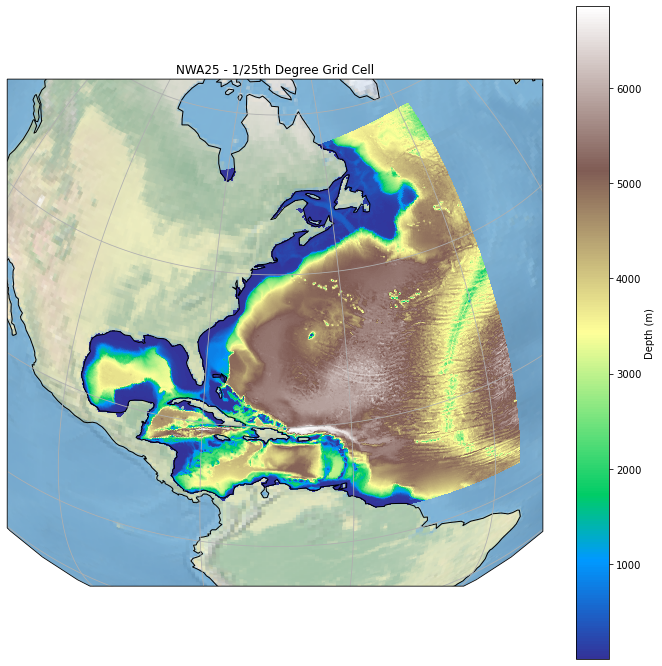

In [233]:
import cartopy.crs as crs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
#subtopo.depth.values = subtopo.depth.where(subtopo.depth!=0)

figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(1,1,1, projection=crs.NearsidePerspective(central_latitude=45, central_longitude=290))
ax.set_extent([-110, -30, -10,60], crs=crs.PlateCarree())
im = ax.pcolormesh(sg.x.values, sg.y.values, subtopo.depth.values, transform=crs.PlateCarree(), cmap='terrain')
plt.colorbar(im, label="Depth (m)")
ax.stock_img()
ax.coastlines()
ax.gridlines()
plt.title("NWA25 - 1/25th Degree Grid Cell")


# Mosaic Files

In [149]:
import sys, os, logging, cartopy
from gridtools.gridutils import GridUtils

inputDir = "/Users/james/Documents/Github/esm_lab/grid_gen/gridInfo/chassxu_subset/"

# Initialize a grid object
grd = GridUtils()
grd.openGrid("/Users/james/Downloads/nwa25.nc", gridType='MOM6')
grd.readGrid()
subtopo['depth']

<xarray.DataArray 'depth' (ny: 845, nx: 775)>
[654875 values with dtype=float32]
Dimensions without coordinates: ny, nx
Attributes:
    units:        m
    description:  topographic depth at T-cell centers

In [150]:
# Write out FMS related support files
grd.makeSoloMosaic(
    topographyGrid=subtopo['depth'],
    writeLandmask=True,
    writeOceanmask=True,
    inputDirectory=inputDir,
    overwrite=True,
)
grd.saveGrid(filename=os.path.join(inputDir, "ocean_hgrid.nc"))


Successfully wrote netCDF file to /Users/james/Documents/Github/esm_lab/grid_gen/gridInfo/chassxu_subset/ocean_hgrid.nc


In [152]:
# configuring z_l
out = xr.open_dataset("/Users/james/Downloads/out.nc")

In [158]:
out.z_l

<xarray.DataArray 'z_l' (z_l: 41)>
array([5.000000e-01, 1.900000e+00, 4.420000e+00, 8.380000e+00, 1.318500e+01,
       1.855500e+01, 2.489500e+01, 3.233000e+01, 4.033000e+01, 4.833000e+01,
       5.633000e+01, 6.433000e+01, 7.233000e+01, 8.033000e+01, 8.833000e+01,
       9.633000e+01, 1.043300e+02, 1.123300e+02, 1.203300e+02, 1.283300e+02,
       1.363300e+02, 1.443300e+02, 1.523300e+02, 1.613300e+02, 1.745300e+02,
       2.006900e+02, 2.398400e+02, 2.860400e+02, 3.405600e+02, 4.048900e+02,
       4.808000e+02, 5.703750e+02, 6.760750e+02, 8.008000e+02, 9.479750e+02,
       1.121645e+03, 1.326570e+03, 1.568380e+03, 1.899270e+03, 2.399270e+03,
       5.449635e+03])
Coordinates:
  * z_l      (z_l) float64 0.5 1.9 4.42 8.38 ... 1.899e+03 2.399e+03 5.45e+03
Attributes:
    long_name:       Depth at cell center
    units:           meters
    cartesian_axis:  Z
    positive:        down
    edges:           z_i

In [162]:
x = xr.open_dataset("/Users/james/Documents/Github/esm_lab/grid_gen/gridInfo/natlGrid/mom6_vgrid.nc")
x.z_l

AttributeError: 'Dataset' object has no attribute 'z_l'

In [155]:
x

<xarray.Dataset>
Dimensions:  (Layer: 41)
Coordinates:
  * Layer    (Layer) float64 1.001e+03 1.001e+03 ... 1.037e+03 1.037e+03
Data variables:
    dz       (Layer) float64 ...